In [36]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt

file_1 = "co-est2021-pop-13.csv"
file_2 = "co-est2020-alldata.csv"

file_1_df = pd.read_csv(file_1, delimiter=",", skiprows=3)

file_1_df.tail(10)
gacensus_21 =file_1_df.drop(range(160,165))

gacensus_21

,Unnamed: 0,Unnamed: 1,2020,2021
0,Georgia,"10,711,908","10,725,800","10,799,566"
1,".Appling County, Georgia","18,444","18,428","18,488"
2,".Atkinson County, Georgia","8,286","8,301","8,391"
3,".Bacon County, Georgia","11,140","11,123","11,079"
4,".Baker County, Georgia","2,876","2,844","2,819"
...,...,...,...,...
155,".Whitfield County, Georgia","102,864","102,727","102,848"
156,".Wilcox County, Georgia","8,766","8,731","8,739"
157,".Wilkes County, Georgia","9,565","9,556","9,513"
158,".Wilkinson County, Georgia","8,877","8,844","8,831"


In [5]:
file_2_df = pd.read_csv(file_2, delimiter=",", encoding="ISO-8859-1")

# file_2_df
file_2_ga = file_2_df[file_2_df['STNAME'] == 'Georgia']
file_2_ga.to_csv('cleanerCounties.csv')
file_2_ga

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019,RNETMIG2020
398,40,3,5,13,0,Georgia,Georgia,9687653,9688737,9712209,...,3.041427,3.798407,1.747055,4.060100,5.814395,7.200931,5.948622,5.638213,6.502924,4.765012
399,50,3,5,13,1,Georgia,Appling County,18236,18237,18337,...,3.098163,-9.988871,-4.843669,2.931914,-4.662637,-0.813824,-1.626457,4.109774,-8.340780,-2.941657
400,50,3,5,13,3,Georgia,Atkinson County,8375,8380,8363,...,-9.329028,-18.178535,-4.116970,-14.082797,7.737879,-11.188643,-7.009063,6.505632,-16.613495,8.402353
401,50,3,5,13,5,Georgia,Bacon County,11096,11097,11062,...,7.833603,-5.021971,0.089582,0.715820,1.071285,2.400747,-9.077964,-10.313901,-2.342976,-7.590133
402,50,3,5,13,7,Georgia,Baker County,3451,3447,3431,...,-38.267576,11.974255,-8.933889,-18.694407,-27.782065,-1.881763,-3.468390,-25.932448,-16.297262,-24.592888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,50,3,5,13,313,Georgia,Whitfield County,102599,102602,102740,...,-5.533701,-5.965944,-7.713370,-1.963739,-0.193555,1.134970,-7.072937,-4.851221,-1.439719,-7.111897
554,50,3,5,13,315,Georgia,Wilcox County,9255,9251,9313,...,-6.572922,-18.889556,1.324284,-14.569315,12.371823,-17.704073,-7.380493,4.213163,-21.390374,-8.299725
555,50,3,5,13,317,Georgia,Wilkes County,10593,10593,10389,...,-13.676706,-12.202923,-10.187775,4.424111,0.301705,-7.600709,9.859728,3.449500,-4.588559,-0.822073
556,50,3,5,13,319,Georgia,Wilkinson County,9563,9569,9528,...,-14.360382,7.303906,-11.569897,-8.581849,-19.495725,-3.425225,-5.674864,10.246130,-7.914832,-9.240478


In [70]:
# trimming df to just populations and name
ga_census_estimate_population = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020"]]
ga_census_estimate_population.reset_index()
ga_census_estimate_population = ga_census_estimate_population.rename(columns={"POPESTIMATE2010": "2010", "POPESTIMATE2011": "2011", "POPESTIMATE2012": "2012", "POPESTIMATE2013": "2013", "POPESTIMATE2014": "2014", 
                                             "POPESTIMATE2015": "2015", "POPESTIMATE2016": "2016", "POPESTIMATE2017": "2017", "POPESTIMATE2018": "2018", "POPESTIMATE2019": "2019", "POPESTIMATE2020": "2020"})
ga_census_estimate_population

,CTYNAME,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
398,Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10710017
399,Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18325
400,Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8393
401,Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11036
402,Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2971
...,...,...,...,...,...,...,...,...,...,...,...,...
553,Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,103837
554,Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8502
555,Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9694
556,Wilkinson County,9528,9413,9481,9361,9283,9080,9021,8953,9005,8936,8812


In [31]:
# this is Yi's 
ga_census_estimate = file_2_ga[["CTYNAME", "POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013", "POPESTIMATE2014", "POPESTIMATE2015", "POPESTIMATE2016", "POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019","POPESTIMATE2020","NPOPCHG_2017","NPOPCHG_2018","NPOPCHG_2019","NPOPCHG_2020","NETMIG2017","NETMIG2018","NETMIG2019","NETMIG2020"]]
ga_census_estimate.reset_index()


,index,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,...,POPESTIMATE2019,POPESTIMATE2020,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,NPOPCHG_2020,NETMIG2017,NETMIG2018,NETMIG2019,NETMIG2020
0,398,Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,...,10628020,10710017,108589,102358,108631,81997,61644,59022,68760,50838
1,399,Appling County,18337,18459,18382,18367,18469,18420,18443,18447,...,18389,18325,4,91,-149,-64,-30,76,-154,-54
2,400,Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,...,8269,8393,-36,87,-75,124,-58,54,-138,70
3,401,Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,...,11098,11036,-64,-108,2,-62,-102,-115,-26,-84
4,402,Baker County,3431,3311,3370,3346,3287,3192,3185,3158,...,3047,2971,-27,-69,-42,-76,-11,-81,-50,-74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,553,Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,...,104265,103837,-228,23,156,-428,-737,-505,-150,-740
156,554,Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,...,8607,8502,-54,4,-177,-105,-65,37,-186,-71
157,555,Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,...,9769,9694,60,-23,-76,-75,97,34,-45,-8
158,556,Wilkinson County,9528,9413,9481,9361,9283,9080,9021,8953,...,8936,8812,-68,52,-69,-124,-51,92,-71,-82


In [19]:
# pick x numbers randomly
randomNumbers = []
i = 0
while i < 10:
    
    num = random.randint(1, 159)
    if num not in randomNumbers:
        randomNumbers.append(num)
        print(num)
        i = i + 1

86
2
62
78
8
114
69
6
51
127


In [114]:
ga_census_estimate_population.iloc[86]

2010    10103
2011    10481
2012    10462
2013    10405
2014    10362
2015    10264
2016    10444
2017    10456
2018    10450
2019    10581
2020    10737
Name: Lanier County, dtype: int64

In [136]:
# ga_census_estimate_population.iloc[86]

countyDataDictionary = {}

for x in randomNumbers:

    countyDataDictionary[x] = ga_census_estimate_population.iloc[x].tolist()
#     countyDataList.append(ga_census_estimate_population.iloc[x])

In [135]:
type(ga_census_estimate_population.iloc[5])

pandas.core.series.Series

In [131]:
countyDataDictionary

{86: [10103,
  10481,
  10462,
  10405,
  10362,
  10264,
  10444,
  10456,
  10450,
  10581,
  10737],
 2: [8363, 8359, 8254, 8263, 8211, 8331, 8293, 8257, 8344, 8269, 8393],
 62: [3079, 3103, 3107, 3060, 3008, 3020, 2976, 3031, 2968, 2959, 2984],
 78: [60706,
  60985,
  60860,
  61286,
  62125,
  63439,
  65091,
  67681,
  70347,
  73015,
  76199],
 8: [100041,
  100110,
  100241,
  100923,
  101251,
  102063,
  103418,
  105190,
  106488,
  107757,
  109426],
 114: [17929,
  17792,
  17780,
  17784,
  17774,
  17935,
  17916,
  18213,
  18622,
  18953,
  19121],
 69: [180070,
  182299,
  184136,
  186459,
  189156,
  192249,
  196176,
  198854,
  201396,
  204310,
  206591],
 6: [18404,
  18245,
  18128,
  18216,
  18220,
  18375,
  18292,
  18607,
  18918,
  19175,
  19352],
 51: [52469,
  52709,
  53360,
  54456,
  55452,
  57125,
  58705,
  60121,
  62274,
  64342,
  65765],
 127: [26124,
  25763,
  25721,
  25571,
  25429,
  25475,
  25680,
  25785,
  26083,
  26017,
  26107]}

In [127]:
ga_census_estimate_population.iloc[x].tolist()

[26124, 25763, 25721, 25571, 25429, 25475, 25680, 25785, 26083, 26017, 26107]

In [55]:
# ga_census_estimate
liberty_df = ga_census_estimate_population.iloc[89]
# type(liberty_df)
liberty_df

CTYNAME            Liberty County
POPESTIMATE2010             62772
POPESTIMATE2011             65210
POPESTIMATE2012             64482
POPESTIMATE2013             62438
POPESTIMATE2014             64217
POPESTIMATE2015             61762
POPESTIMATE2016             61672
POPESTIMATE2017             61819
POPESTIMATE2018             60887
POPESTIMATE2019             62813
POPESTIMATE2020             63004
Name: 487, dtype: object

In [61]:
ga_census_estimate_population

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
CTYNAME,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10710017
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18325
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8393
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11036
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2971
...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,103837
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8502
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9694


In [93]:
# ga_census_estimate_population = ga_census_estimate_population.set_index('CTYNAME')
ga_census_estimate_population


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
CTYNAME,,,,,,,,,,,
Georgia,9712209,9803630,9903580,9975592,10071204,10183353,10308442,10417031,10519389,10628020,10710017
Appling County,18337,18459,18382,18367,18469,18420,18443,18447,18538,18389,18325
Atkinson County,8363,8359,8254,8263,8211,8331,8293,8257,8344,8269,8393
Bacon County,11062,11150,11152,11174,11178,11225,11268,11204,11096,11098,11036
Baker County,3431,3311,3370,3346,3287,3192,3185,3158,3089,3047,2971
...,...,...,...,...,...,...,...,...,...,...,...
Whitfield County,102740,102909,102926,102691,103039,103621,104314,104086,104109,104265,103837
Wilcox County,9313,9248,9069,9054,8929,9015,8834,8780,8784,8607,8502
Wilkes County,10389,10230,10093,9931,9960,9927,9808,9868,9845,9769,9694


In [62]:

years = ga_census_estimate_population.keys()
# Plot the unemployment values for a single country
# country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]], 
#                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])
years

Index(['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018',
       'POPESTIMATE2019', 'POPESTIMATE2020'],
      dtype='object')

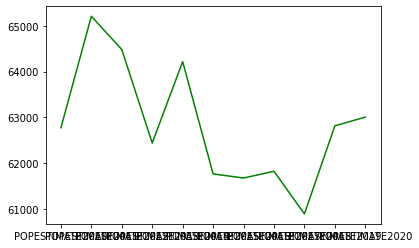

In [101]:
country_one, = plt.plot(years, ga_census_estimate_population.loc['Liberty County',["2010","2011","2012","2013","2014","2015",
                                                                  "2016","2017","2018","2019","2020"]], 
                        color="green")

plt.show()

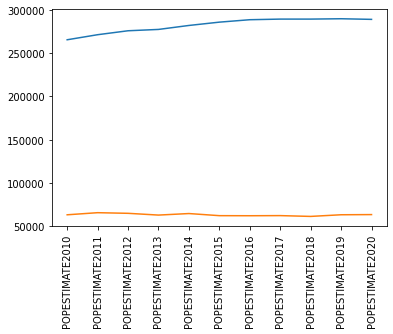

In [112]:
# ga_census_estimate_population.loc[:,["2010","2011","2012","2013","2014","2015",
#                                                                   "2016","2017","2018","2019","2020"]]
ga_census_estimate_population.loc["Georgia"]


# transposed = ga_census_estimate_population.T
# ax.plot(df_pop_density['Country'],
#          df_pop_density['Area(100kmsq)'],
#          marker='o', linewidth=2, label='Area')


country_one, = plt.plot(years, ga_census_estimate_population.loc["Chatham County"], label="Chatham County")
country_one, = plt.plot(years, ga_census_estimate_population.loc["Liberty County"], label="Liberty County")


plt.xticks(rotation=90)
plt.show()

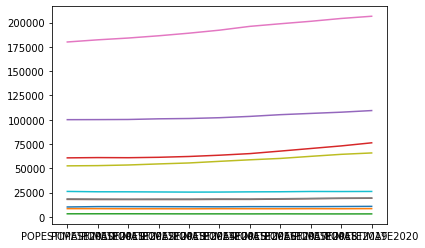

In [143]:

for x in countyDataDictionary.keys():
#     print(countyDataDictionary[x])
    plt.plot(years, countyDataDictionary[x])
    
plt.show()
